## Power monitor readings for all finetuning training

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [3]:
df_reading = pd.read_csv("results/finetune_pm.csv")

In [4]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [5]:
df_time_interval = pd.read_csv("results/result_final.csv")

In [6]:
df_time_interval.columns

Index(['dataset', 'batchsize', 'max_seq_len', 'mean_power', 'total_time',
       'power', 'summed_power', 'gpu_util', 'gpu1_util', 'gpu2_util',
       'gpu1_mean_power', 'gpu2_mean_power', 'memory_util', 'memory_used',
       'start_time', 'end_time', 'dataset_size', 'total_batchsize',
       'samples_per_sec', 'time_per_sample', 'TFLOPs', 'PFLOPs',
       'PFLOPs_per_example'],
      dtype='object')

In [7]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,end_time,dataset_size,total_batchsize,samples_per_sec,time_per_sample,TFLOPs,PFLOPs,PFLOPs_per_example,start_seconds,end_seconds
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,2020-06-19 16:14:01.978,635,64,118.161518,0.008463,2.901790e+04,29.017895,0.015232,2020-06-19 15:13:45.856,2020-06-19 15:14:01.978
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,2020-06-13 16:06:21.295,67349,32,409.403140,0.002443,1.045146e+06,1045.145564,0.005173,2020-06-13 14:58:07.779,2020-06-13 15:06:21.295
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,2020-06-13 20:28:17.789,3668,56,142.586882,0.007013,1.595108e+05,159.510789,0.014496,2020-06-13 19:27:00.615,2020-06-13 19:28:17.789
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,2020-06-22 10:42:52.159,2490,128,171.751776,0.005822,8.899584e+04,88.995842,0.011914,2020-06-22 09:42:08.666,2020-06-22 09:42:52.159
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,2020-06-22 10:46:40.271,5749,128,168.256849,0.005943,2.210020e+05,221.001972,0.012814,2020-06-22 09:44:57.767,2020-06-22 09:46:40.271


In [8]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]

In [9]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()

In [10]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'pm_mean_power'] = power_mean(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [11]:
df_time_interval['pm_power'] = (df_time_interval['pm_mean_power'] * df_time_interval['total_time']) / (1000 * 3600)
df_time_interval.head()

,dataset,batchsize,max_seq_len,mean_power,total_time,power,summed_power,gpu_util,gpu1_util,gpu2_util,...,PFLOPs,PFLOPs_per_example,start_seconds,end_seconds,s_date,e_date,s_time,e_time,pm_mean_power,pm_power
0,WNLI,32,128,182.903548,16.122,0.001638,0.001575,79.360417,76.187500,82.533333,...,29.017895,0.015232,2020-06-19 15:13:45.856,2020-06-19 15:14:01.978,2020-06-19,2020-06-19,15:13:45,15:14:01,386.649167,0.001732
1,SST-2,16,256,211.759289,493.516,0.058059,0.057116,93.375404,91.858025,94.892784,...,1045.145564,0.005173,2020-06-13 14:58:07.779,2020-06-13 15:06:21.295,2020-06-13,2020-06-13,14:58:07,15:06:21,542.597836,0.074384
2,MRPC,28,128,204.860397,77.174,0.008783,0.008593,91.133070,86.039474,96.226667,...,159.510789,0.014496,2020-06-13 19:27:00.615,2020-06-13 19:28:17.789,2020-06-13,2020-06-13,19:27:00,19:28:17,511.313231,0.010961
3,RTE,64,128,225.741977,43.493,0.005455,0.005393,90.220930,93.023256,87.418605,...,88.995842,0.011914,2020-06-22 09:42:08.666,2020-06-22 09:42:52.159,2020-06-22,2020-06-22,09:42:08,09:42:52,548.885000,0.006631
4,STS-B,64,128,237.987861,102.504,0.013553,0.013288,95.063168,92.366337,97.760000,...,221.001972,0.012814,2020-06-22 09:44:57.767,2020-06-22 09:46:40.271,2020-06-22,2020-06-22,09:44:57,09:46:40,553.509829,0.015760


slope 0.002786735434322657 
intercept 0.008525631680772652
r_value 0.9858755550378621
p_value 2.5547329522815893e-30
std_err 7.782775261585367e-05
R squared  0.9719506100212126


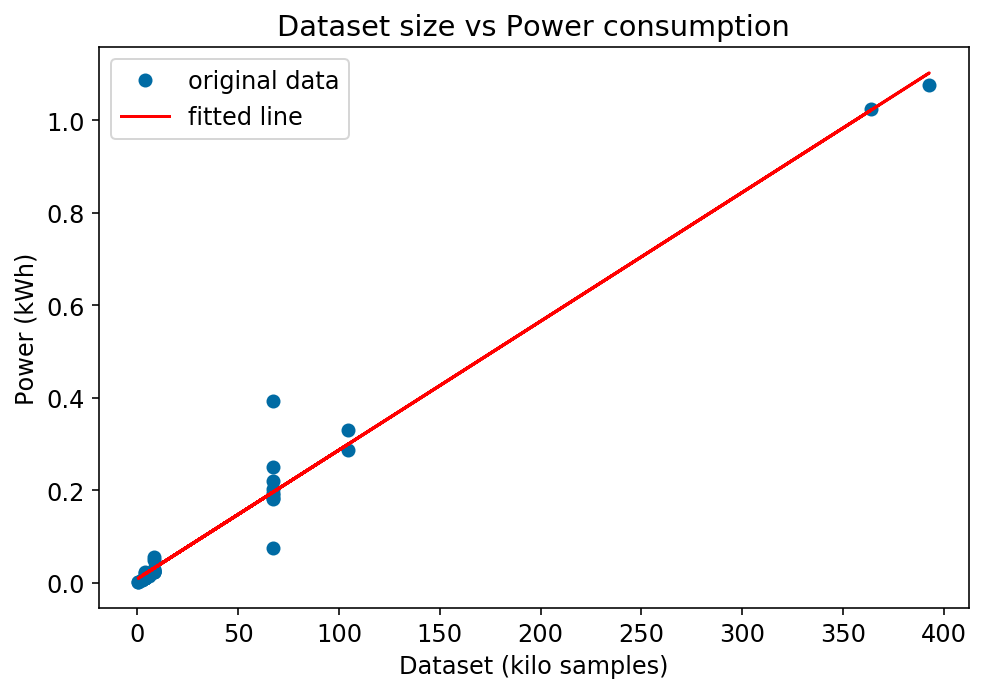

In [12]:
from scipy import stats
x = df_time_interval['dataset_size'] /1000
y = df_time_interval["pm_power"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Dataset (kilo samples)")
plt.ylabel("Power (kWh)")
plt.title("Dataset size vs Power consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/dataVsPmPower.png',dpi=300)

slope -7.01168459837592e-05 
intercept 0.013764129555051569
r_value -0.9106376832449049
p_value 0.0006430276944281259
std_err 1.2025249990806118e-05
R squared  0.8292609901456478


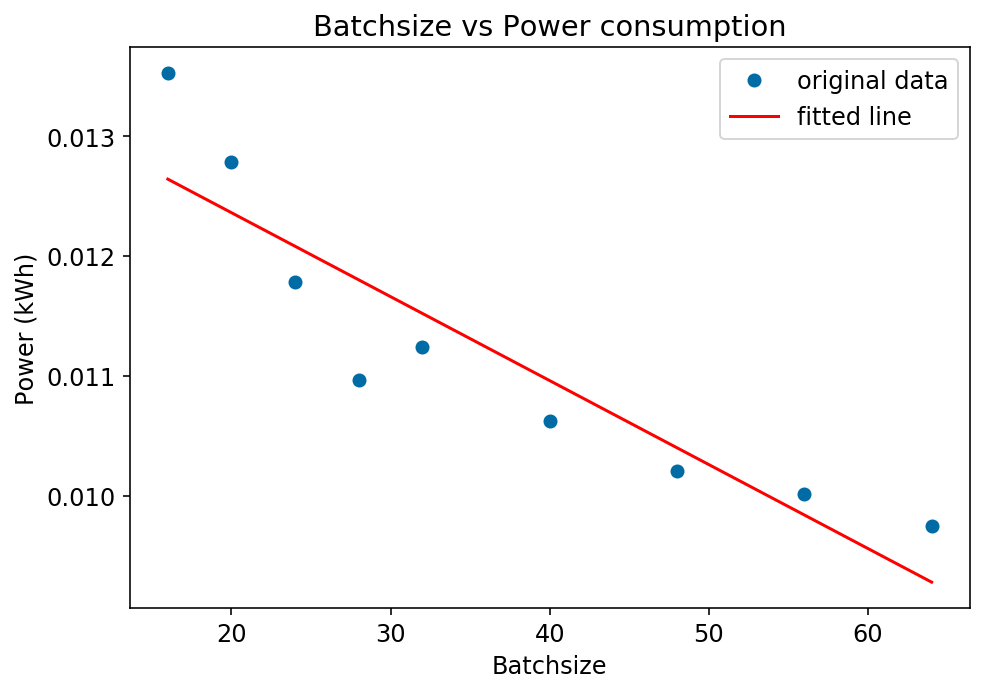

In [13]:
df_mrpc = df_time_interval.loc[(df_time_interval.dataset == 'MRPC') & (df_time_interval.max_seq_len == 128)]
df_mrpc =df_mrpc.sort_values('batchsize')
x = df_mrpc['batchsize']
y = df_mrpc["pm_power"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Batchsize")
plt.ylabel("Power (kWh)")
plt.title("Batchsize vs Power consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/batchVsPmPower.png',dpi=300)

In [14]:
df_64 = df_time_interval.loc[(df_time_interval.batchsize == 64) & (df_time_interval.max_seq_len == 128)]
df_64 = df_64.sort_values('dataset_size')

In [15]:
df_64["datacenter_power"] = df_64["pm_power"] * 1.58
#df_64["CO2e"] = df_64[datacenter_power] * #average co2e ???

In [17]:
df_co2 = pd.read_csv("results/co2data.csv")
df_co2.head()

,provider,providerName,offsetRatio,region,regionName,country,state,city,impact,source,comment,country_code,continent,continent_name
0,gcp,Google Cloud Platform,100,asia-east1,NaN,Taiwan,NaN,Changhua County,557.0,"measured on July 2, 2019 between 8 and 9 PM, ...",NaN,TW,AS,Asia
1,gcp,Google Cloud Platform,100,asia-east2,NaN,China,NaN,Hong Kong,702.0,https://www.sciencedirect.com/science/article/...,NaN,CN,AS,Asia
2,gcp,Google Cloud Platform,100,asia-northeast1,NaN,Japan,NaN,Tokyo,516.0,https://www.sciencedirect.com/science/article/...,NaN,JP,AS,Asia
3,gcp,Google Cloud Platform,100,asia-northeast2,NaN,Japan,NaN,Osaka,516.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,JP,AS,Asia
4,gcp,Google Cloud Platform,100,asia-south1,NaN,India,NaN,Mumbai,920.0,https://www.fepc.or.jp/library/pamphlet/pdf/04...,NaN,IN,AS,Asia


In [18]:
uk_co2 = df_co2.loc[df_co2.country == 'United Kingdom'].impact.mean()

In [24]:
df_64['CO2e'] = uk_co2 * df_64['datacenter_power']
df_64['kg CO2e/kWh'] = df_64['CO2e'] /1000

In [26]:
features = ['dataset','power','gpu_util','pm_power','datacenter_power','PFLOPs','kg CO2e/kWh']
df_64[features]

,dataset,power,gpu_util,pm_power,datacenter_power,PFLOPs,kg CO2e/kWh
21,WNLI,0.001464,86.753205,0.001584,0.002502,25.816390,0.001559
3,RTE,0.005455,90.220930,0.006631,0.010477,88.995842,0.006527
10,MRPC,0.008327,93.104839,0.009749,0.015403,132.803863,0.009596
4,STS-B,0.013553,95.063168,0.015760,0.024901,221.001972,0.015513
22,CoLA,0.020215,92.684397,0.022649,0.035785,301.688725,0.022294
30,SST-2,0.148568,93.989130,0.181029,0.286025,2422.286655,0.178194
26,QNLI,0.233949,94.669243,0.286895,0.453294,3811.522709,0.282402
11,QQP,0.805321,94.794252,1.024411,1.618570,14034.283013,1.008369
36,MNLI,0.859979,94.176631,1.076558,1.700962,14581.872801,1.059700
